In [131]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [132]:
train = pd.read_csv('../../data/profile_data_train.csv')
test = pd.read_csv('../../data/profile_data_test.csv')

In [133]:
train_len = len(train)
test_len = len(test)
X_train = train['tweets_text']
y_train = train['age_group']
X_test = test['tweets_text']
y_test = test['age_group']

In [134]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [135]:
clfrNB = MultinomialNB()

In [136]:
from skopt.space import Real
from skopt.utils import use_named_args

# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
# skopt_grid = {
#     'max_depth': (4, 12),
#     'learning_rate': (0.01, 0.5), 
#     'n_estimators': (20, 1000), 
#     'gamma': (0, 0.5), 
#     'min_child_weight': (1, 5),
#     'subsample': (0.1, 1),
#     'colsample_bytree': (0.1, 1)}

skopt_grid  = [Real(0, 5, name='alpha')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(skopt_grid)
def objective(**params):
    clfrNB.set_params(**params)

    return -np.mean(cross_val_score(clfrNB, X_train_vectorized, y_train, cv=5, n_jobs=-1,
                                    scoring="accuracy"))

In [ ]:
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score

res_gp = gp_minimize(objective, skopt_grid, n_calls=100, random_state=0, verbose=True)

"Best score=%.4f" % res_gp.fun

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2803
Function value obtained: -0.4085
Current minimum: -0.4085
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0628
Function value obtained: -0.3949
Current minimum: -0.4085
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0480
Function value obtained: -0.3943
Current minimum: -0.4085
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0546
Function value obtained: -0.3949
Current minimum: -0.4085
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0681
Function value obtained: -0.4079
Current minimum: -0.4085
Iteration No: 6 started. 

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.3307
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.2205
Function value obtained: -0.4432
Current minimum: -0.4732
Iteration No: 14 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.2470
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.2927
Function value obtained: -0.4432
Current minimum: -0.4732
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Time taken: 0.2021
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 17 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.3898
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.2514
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 19 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7283
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.7548
Function value obtained: -0.4432
Current minimum: -0.4732
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.3834
Function value obtained: -0.4397
Current minimum: -0.4732
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.3559
Function value obtained: -0.4408
Current minimum: -0.4732
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.3754
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 24 st

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.4784
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 31 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.4239
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 32 started. Searching for the next optimal point.
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.5311
Function value obtained: -0.4438
Current minimum: -0.4732
Iteration No: 33 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.5626
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 34 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.5612
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.4537
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.5711
Function value obtained: -0.4173
Current minimum: -0.4732
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.5490
Function value obtained: -0.4367
Current minimum: -0.4732
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.4753
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 39 st

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.4010
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 40 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.4153
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 41 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.4315
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 42 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.4398
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4848
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.4487
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4418
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.4133
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 47 st

/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.8026
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 49 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.5769
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.6472
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 51 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 0.6158
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 52 started. Searching for the next optimal point.
Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 0.5858
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 53 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 0.7135
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 54 started. Searching for the next optimal point.
Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 0.5201
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 55 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 0.5048
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 56 started. Searching for the next optimal point.
Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 0.5368
Function value obtained: -0.4167
Current minimum: -0.4732
Iteration No: 57 started. Searching for the next optimal point.
Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 0.5904
Function value obtained: -0.3890
Current minimum: -0.4732
Iteration No: 58 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 1.1994
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 59 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.8210
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 60 started. Searching for the next optimal point.


/Users/sshetkar/opt/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 1.0966
Function value obtained: -0.4208
Current minimum: -0.4732
Iteration No: 61 started. Searching for the next optimal point.
Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 0.7729
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 62 started. Searching for the next optimal point.
Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 0.5920
Function value obtained: -0.4679
Current minimum: -0.4732
Iteration No: 63 started. Searching for the next optimal point.
Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 0.6399
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 64 started. Searching for the next optimal point.
Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 0.5501
Function value obtained: -0.4697
Current minimum: -0.4732
Iteration No: 65 st

In [124]:
print("""Best parameters:
- alpha=%.100f""" % (res_gp.x[0]))

Best parameters:
- alpha=0.0050078232198780278996985693140686635160818696022033691406250000000000000000000000000000000000000000


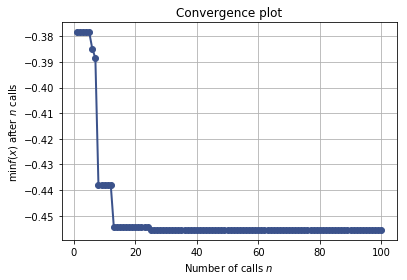

In [126]:
from skopt.plots import plot_convergence
import matplotlib
plot_convergence(res_gp)

In [127]:
scikitopt_model = MultinomialNB(alpha=0.005007823219878027899698569314068663516081869602203369140625)

In [128]:
scikitopt_model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.005007823219878028, class_prior=None, fit_prior=True)

In [129]:
preds = scikitopt_model.predict(vect.transform(X_test))
score = accuracy_score(y_test, preds)

In [130]:
print(score)

0.4588235294117647
